In [1]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

# Homework 2
## Hypothesis testing

Maximum number of points for this hometask is 10. Some tasks allow you to get a bonus point, that **can not** increase your total score for the homework beyond the maximum, but can compensate for some occasionally lost points.

### Task 1 (1.5 points)

A randomized, double-blind experiment was conducted to assess the
effectiveness of several drugs for reducing postoperative nausea. The
data are as follows:

In [2]:
df1 = pd.DataFrame({'Drug': ['Placebo', 'Chlorpromazine', 'Dimenhydrinate', 'Pentobarbital (100 mg)', 'Pentobarbital (150 mg)'],
                    'Number of Patients': [80, 75, 85, 67, 85],
                    'Incidence of Nausea': [45, 26, 52, 35, 37]})
df1

,Drug,Number of Patients,Incidence of Nausea
0,Placebo,80,45
1,Chlorpromazine,75,26
2,Dimenhydrinate,85,52
3,Pentobarbital (100 mg),67,35
4,Pentobarbital (150 mg),85,37


Test each drug versus the placebo at the 5 per cent level. Also, report
the estimated odds–ratios. Summarize your findings. (1.5 points)
*Hint*. Use simple $H_0$: "$p = p_0$".

**Solution:**

In [3]:
placebo_idx = df1[df1['Drug']=='Placebo'].index.item()

hats = df1['Incidence of Nausea']/df1['Number of Patients']
se = np.sqrt((hats * (1 - hats))/df1['Number of Patients'])

odds = hats / (1 - hats)
placebo_OR = odds[placebo_idx]/odds

# The absolute number of tests is huge enough, so let use asymptotic estimation (Wald test, normal cdf) instead of "binomial games".
Wald = (hats - hats[placebo_idx])/np.sqrt(se**2 + se[placebo_idx]**2)
p_val = 2. * (1 - scipy.stats.norm.cdf(abs(Wald), loc=0.0, scale=1.0))

res = pd.DataFrame(np.array([df1.Drug.values, placebo_OR, p_val]).T[1:], columns = ['Drug', 'OR', 'p-val'])
# The null hypothesis is *strongly* rejected (p_val ~ 0.5%) only for the Chlorpromazine with the highest odd-rate (~2.4).
# For the rest, it is impossible to say for sure whether the null hypothesis is true or not.
res

,Drug,OR,p-val
0,Chlorpromazine,2.42308,0.00570339
1,Dimenhydrinate,0.815934,0.520232
2,Pentobarbital (100 mg),1.17551,0.626664
3,Pentobarbital (150 mg),1.66795,0.0996392


### Task 2: permutation test (2 points)

For this task we will use the famous Iris dataset, originaly studied by R.A. Fisher himself.

In [4]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We will select two species: *setosa* and *virginica* and study the sepal length.

In [5]:
X = iris[iris.species == 'setosa']['sepal_length'].values #length, not width!
Y = iris[iris.species == 'virginica']['sepal_length'].values #length, not width!

Test the hypothesis $H_0$: quantile of level 0.2 (20 percentile, lower 20%) of the sepal length of *setosa* flowers is equal to that of *virginica* flowers. Use permutation test, approximate the full permutation distribution with 10,000 samples. 


**Solution:**

p_val = 0.0


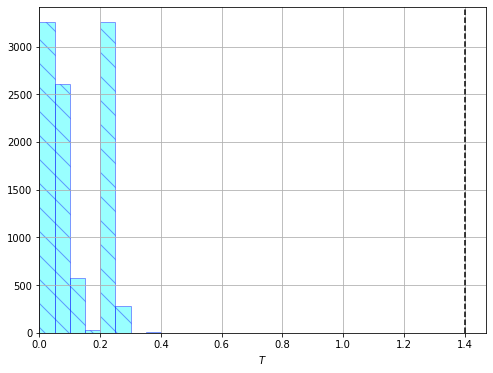

In [6]:
N = 10_000
n = X.shape[0]
m = Y.shape[0]
p = 20

sample = np.array(np.hstack((X, Y)))
T_values_set = np.zeros(N)
for i in range(N):
    permutated = np.random.permutation(sample)
    q_p_X = np.percentile(permutated[:n], p, interpolation = 'lower')
    q_p_Y = np.percentile(permutated[n:], p, interpolation = 'lower')
    T_values_set[i] = abs(q_p_X - q_p_Y)
        
t_obs = abs(np.percentile(X, p, interpolation = 'lower') - np.percentile(Y, p, interpolation = 'lower'))
print(f'p_val = {np.sum(T_values_set > t_obs)/N}')

plt.figure(figsize=(8, 6))
plt.hist(T_values_set, alpha = 0.4, facecolor = 'cyan', edgecolor = 'blue', hatch = '\\')
plt.axvline(t_obs, color = 'black', ls = '--')
plt.xlim(left=0)
plt.xlabel('$T$')
plt.grid()
plt.show()

# p_val ~ 0, so we can easily reject the null hypothesis, i.e. we can conclude that the quantiles of the distributions do not coincide. 
# It is worth noting that the "true" p_val != 0, yet we got exactly 0 because of the limited power of the set of permutations, i.e. 10000 << 100!.

### Task 3: computational approach to hypothesis testing

STRONGLY Recommended reading: http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html

Consider the following dataset (service hours between failures of the air-conditioning equipment in a Boeing 720 jet aircraft , Proschan, 1963):

In [7]:
Y = np.array([3, 5, 7, 18, 43, 85, 91, 98, 100, 130, 230, 487])

This sample was sorted for easier presentation.

1. Compute an estimate of the median time between failures (1 point)
2. Consider the null hypothesis $H_0$ to be: "median time between failures is one week" (1 point)
3. What distribution will you choose for this kind of data under $H_0$? (1 point)
4. Choose a statistic to measure the deviation from $H_0$ (effect size) (1 point)
5. Check whether you can reject $H_0$ at significance level 5% and calculate the corresponding approximate $p$-value. Use 10,000 simulations for your experiment (1 point)
6. Plot histogram of simulated effect sizes and mark the observed effect size (1 bouns point)

**Solution:**

88.0 108.08333333333333
exp, p_val = 0.253
uniform, p_val = 0.0609


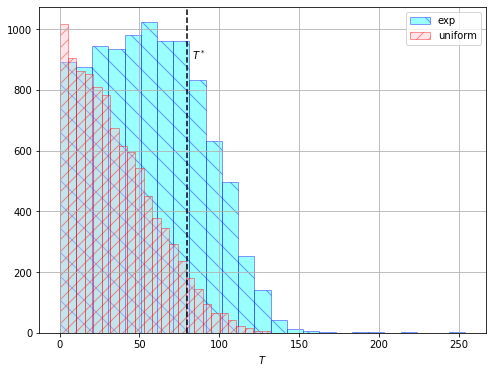

In [8]:
n = Y.shape[0]

#1. Compute an estimate of the median time between failures
# An estimate of the median can obviously be an empirical median or empirical mean.
print(np.median(Y), np.mean(Y))

#2. Consider the null hypothesis 𝐻0 to be: "median time between failures is one week" (1 point)
# H_0: median(sample) > threshold = 7*24 hours.
threshold = 7*24

#3. What distribution will you choose for this kind of data under 𝐻0
# Let us use the straightforward model of exponential time distribution (aka Poisson in the context of occurring events).
# So, we can use the threhold value as the mu parameter, i.e., mu = mean = median = threhold.
mu = threshold
# As a silly alternative, let consider a uniform distribution on the interval [0, 2*threshold].

#4. Choose a statistic to measure the deviation from H_0 (effect size)
# Since we wanted to examine the median, let's use the median over the sample with the size of the original set (Y).
# To facilitate further calculations, it is also proposed to shift this value by threshold and take the absolute value.
# As a result, T = abs(np.median(sample) - threshold)

#5. Check whether you can reject H_0 at significance level 5% and calculate the corresponding approximate 𝑝-value. 
# Use 10,000 simulations for your experiment
N = 10_000
T_values_set = np.zeros((N,2))
for i in range(N):
    sample = scipy.stats.expon.rvs(scale=mu, size=n)
    T_values_set[i, 0] = abs(np.median(sample) - threshold)
    sample = scipy.stats.uniform.rvs(scale=2*mu, size=n)
    T_values_set[i, 1] = abs(np.median(sample) - threshold)
    
t_obs = abs(np.median(Y) - threshold)
print(f'exp, p_val = {np.sum(T_values_set[:, 0] > t_obs)/N}')
print(f'uniform, p_val = {np.sum(T_values_set[:, 1] > t_obs)/N}')
# The resulting p-value for both model distributions is greater than 5%, so unfortunately we cannot reject the null hypothesis about median.

#6. Plot histogram of simulated effect sizes and mark the observed effect size
plt.figure(figsize=(8, 6))
plt.hist(T_values_set[:, 0], bins=25, alpha = 0.4, facecolor = 'cyan', edgecolor = 'blue', hatch = '\\', label = 'exp')
plt.hist(T_values_set[:, 1], bins=25, alpha = 0.4, facecolor = 'pink', edgecolor = 'red', hatch = '//', label = 'uniform')
plt.axvline(t_obs, color = 'black', ls = '--')
plt.annotate('$T^*$', (t_obs+3, 900))
plt.legend()
#plt.ylim(0, 1000)
plt.xlabel('$T$')
plt.grid()
plt.show()

# From the graphs also conclude that the p-value (the tail of the distribution to the right of the line) is also large enough to reject the null hypothesis.

### Task 4: power analysis

In 1861, 10 essays appeared in the New Orleans Daily Crescent. They
were signed “Quintus Curtius Snodgrass” and some people suspected
they were actually written by Mark Twain. To investigate this, we will
consider the proportion of three letter words found in an author’s work.
From eight Twain essays we have:

In [9]:
X = np.array([.225, .262, .217, .240, .230, .229, .235, .217])

From 10 Snodgrass essays we have:

In [10]:
Y = np.array([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

1. Perform a Wald test for equality of the means. Use the nonparametric plug-in estimator. Report the p-value and a 95 per cent confidence
interval for the difference of means. What do you conclude? (1.5 points)
2. Now use a permutation test to avoid the use of large sample methods.
What is your conclusion? (Brinegar (1963)) (1.5 bonus points)
3. Assume that samples do indeed come from different populations. Additionally, observed sample means and variaces for the two samples are equal to the true values for the respective population. Estimate the power of the two tests above under two model distributions for the data: Normal and [Beta](https://en.wikipedia.org/wiki/Beta_distribution) (2 bonus points)

**Solution:**

In [11]:
#1. Perform a Wald test for equality of the means. Use the nonparametric plug-in estimator. 
# Report the p-value and a 95 per cent confidence interval for the difference of means. What do you conclude?
conf_percent = 95.

delta = X.mean() - Y.mean()
se = np.sqrt(np.var(X)/X.shape[0] + np.var(Y)/Y.shape[0])

z = scipy.stats.norm.ppf(1. - (1. - conf_percent/100)/2)
conf_interval = [delta - se*z, delta + se*z]

Wald = delta / se
p_val = 2 * (1 - scipy.stats.norm.cdf(abs(Wald)))

print(f'p_val = {p_val}')
print(f'{round(delta, 4)} in [{round(conf_interval[0], 4)}, {round(conf_interval[1], 4)}]')
# p_val is extremely low, which allows us to reject the null hypothesis, i.e., to say that the sample Y is not Mark Twain texts.
# In addition, according to the interpretation of the Wald method, we see that the delta is almost in the center of the normal confidence interval, 
# which is described by p_val ~ 0.

p_val = 7.992664956146811e-05
0.0222 in [0.0112, 0.0332]


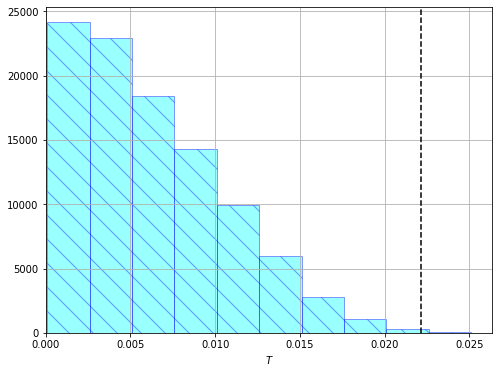

p_val = 0.00063


In [12]:
# Now use a permutation test to avoid the use of large sample methods. What is your conclusion? (Brinegar (1963))
N = 100_000
n = X.shape[0]
m = Y.shape[0]

t_obs = abs(delta)
sample = np.array(np.hstack((X, Y)))
T_values_set = np.zeros(N)
for i in range(N):
    permutated = np.random.permutation(sample)
    T_values_set[i] = abs(np.mean(permutated[:n]) - np.mean(permutated[n:]))
        
plt.figure(figsize=(8, 6))
plt.hist(T_values_set, alpha = 0.4, facecolor = 'cyan', edgecolor = 'blue', hatch = '\\')
plt.axvline(t_obs, color = 'black', ls = '--')
plt.xlim(left=0)
plt.xlabel('$T$')
plt.grid()
plt.show()

print(f'p_val = {np.sum(T_values_set > t_obs)/N}')
# Again, p_val is extremely low, which allows us to reject the null hypothesis, i.e., to say that the sample Y is not Mark Twain texts.

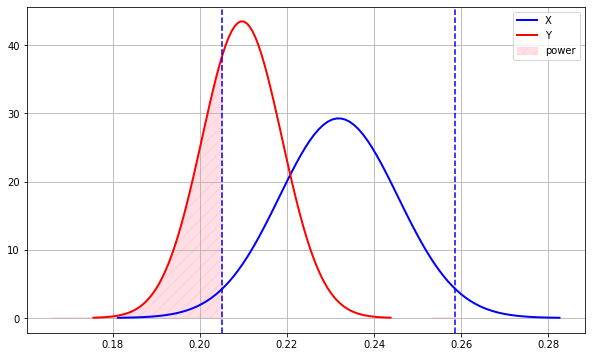

norm, power = 0.3106759746619173


In [13]:
# Assume that samples do indeed come from different populations. 
# Additionally, observed sample means and variaces for the two samples are equal to the true values for the respective population. 
# Estimate the power of the two tests above under two model distributions for the data: Normal and Beta 

# We can reckon the power of the test as a 1 - beta = 1 - false negative rate (type 2 error).
# The parameters of the distributions will be determined on the basis of the empirical expectation and variance of each of the samples.

alpha = 0.05

plt.figure(figsize=(10, 6))
# normal distribution
rv1 = scipy.stats.norm(loc=np.mean(X), scale=np.sqrt(np.var(X)))
x = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 100)
plt.plot(x, rv1.pdf(x), 'b-', lw=2, label='X')

rv2 = scipy.stats.norm(loc=np.mean(Y), scale=np.sqrt(np.var(Y)))
x = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 100)
plt.plot(x, rv2.pdf(x), 'r-', lw=2, label='Y')

plt.axvline(rv1.ppf(alpha/2), color='b', ls='--')
plt.axvline(rv1.ppf(1.-alpha/2), color='b', ls='--')

plt.fill_between(np.linspace(rv2.ppf(1e-6), rv1.ppf(alpha/2), 100),
                 rv2.pdf(np.linspace(rv2.ppf(1e-6), rv1.ppf(alpha/2), 100)), 
                 color = 'pink', alpha = 0.5, hatch = '//')

plt.fill_between(np.linspace(rv1.ppf(1 - alpha/2), rv2.ppf(1.-1e-6), 100),
                 rv2.pdf(np.linspace(rv1.ppf(1 - alpha/2), rv2.ppf(1.-1e-6), 100)), 
                 color = 'pink', alpha = 0.5, hatch = '//', label = 'power')


plt.grid()
plt.legend()
plt.show()

# For the null hypothesis (blue, sampling distribution X) and the alternative hypothesis (red, sampling distribution Y) we obtain:
power = rv2.cdf(rv1.ppf(alpha/2)) + (1 - rv2.cdf(rv1.ppf(1.-alpha/2)))
print(f'norm, power = {power}')

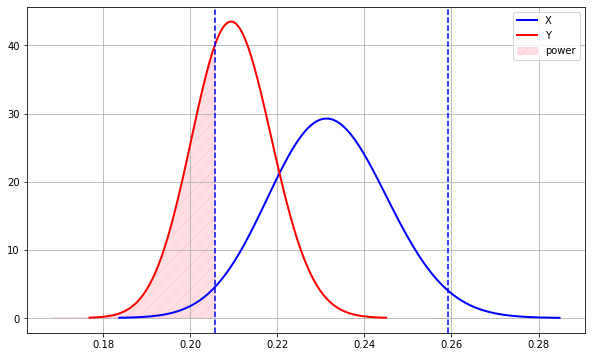

beta, power = 0.33497115718082604


In [14]:
alpha = 0.05

# beta distribution
E = np.mean(X)
D = np.var(X)
a = ((1 - E)/D - 1/E)*E**2
b = a*(1/E - 1)
rv1 = scipy.stats.beta(a, b)

E = np.mean(Y)
D = np.var(Y)
a = ((1 - E)/D - 1/E)*E**2
b = a*(1/E - 1)
rv2 = scipy.stats.beta(a, b)

plt.figure(figsize=(10, 6))

x = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 100)
plt.plot(x, rv1.pdf(x), 'b-', lw=2, label='X')

x = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 100)
plt.plot(x, rv2.pdf(x), 'r-', lw=2, label='Y')

plt.axvline(rv1.ppf(alpha/2), color='b', ls='--')
plt.axvline(rv1.ppf(1.-alpha/2), color='b', ls='--')

plt.fill_between(np.linspace(rv2.ppf(1e-6), rv1.ppf(alpha/2), 100),
                 rv2.pdf(np.linspace(rv2.ppf(1e-6), rv1.ppf(alpha/2), 100)), 
                 color = 'pink', alpha = 0.5, hatch = '//')

plt.fill_between(np.linspace(rv1.ppf(1 - alpha/2), rv2.ppf(1.-1e-6), 100),
                 rv2.pdf(np.linspace(rv1.ppf(1 - alpha/2), rv2.ppf(1.-1e-6), 100)), 
                 color = 'pink', alpha = 0.5, hatch = '//', label = 'power')

plt.grid()
plt.legend()
plt.show()

# For the null hypothesis (blue, sampling distribution X) and the alternative hypothesis (red, sampling distribution Y) we obtain:
power = rv2.cdf(rv1.ppf(alpha/2)) + (1 - rv2.cdf(rv1.ppf(1.-alpha/2)))
print(f'beta, power = {power}')